# HW3 -- SVM

    姓名: 施宏勲
    學號: 5114029040

## 題目: 請以 SVM 來進行預測，並與之前的結果進行比較（除了準確度之外，也應包含訓練時間）。

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time
import pandas as pd

# 讀取前處理後的資料
data = pd.read_csv("../week7_hw_data_processing/output/feature_select_by_myself.csv")
X = data.drop("y", axis=1)
y = data["y"]

### 分割資料成訓練集和測試集

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

### Logistic Regression 訓練及評估

In [9]:
lr = LogisticRegression(max_iter=1000)
start_lr = time.time()
lr.fit(X_train, y_train)

train_lr = time.time() - start_lr

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

Y_scores = lr.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, Y_scores)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression 評估")
print(f"訓練時間: {train_lr:.3f} 秒")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Logistic Regression 評估
訓練時間: 0.042 秒
Accuracy: 0.8915
Precision: 0.7000
Recall: 0.1619
F1-Score: 0.2630
AUC: 0.7481


### Logistic Regression ROC 曲線繪圖

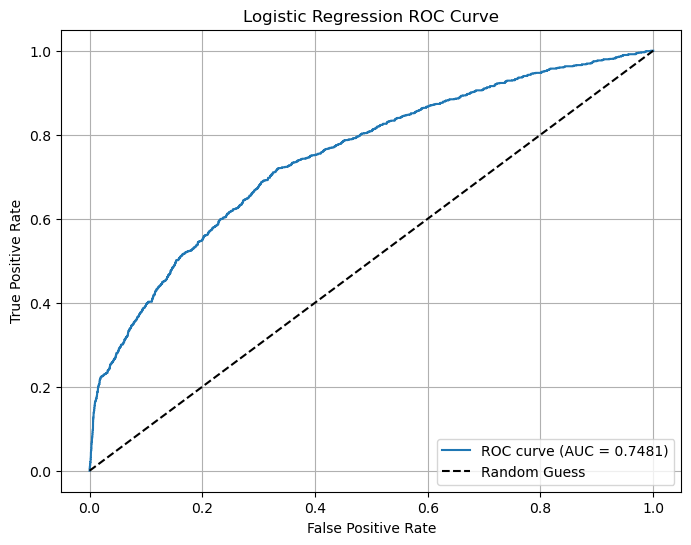

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.4f)" % auc)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 多項式回歸預測與評估

In [11]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=1000
)
poly_reg = LinearRegression()

start_poly = time.time()
poly_reg.fit(X_poly_train, y_poly_train)
train_poly = time.time() - start_poly

y_poly_pred = poly_reg.predict(X_poly_test)
r2 = r2_score(y_poly_test, y_poly_pred)

print("\nPolynomial Regression Performance:")
print(f"訓練時間: {train_poly:.3f} 秒")
print(f"R² score: {r2:.4f}")


Polynomial Regression Performance:
訓練時間: 0.203 秒
R² score: 0.1497


### Week 11 SVM 預測，包含訓練時間與效能評估

In [12]:
## SVM: GridSearchCV找最佳參數
param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 5, 10],
    "gamma": ["scale", 0.01, 0.1],
}
gs = GridSearchCV(SVC(), param_grid, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)

# 將y轉換為-1和1
y_train = y_train.replace({0: -1, 1: 1})
y_test = y_test.replace({0: -1, 1: 1})

start_gridsearch = time.time()
gs.fit(X_train, y_train)
search_time = time.time() - start_gridsearch

print("\nGridSearchCV 完成, 耗時: %.3f 秒" % search_time)
print("最佳SVM參數:", gs.best_params_)
print("最佳訓練集交叉驗證分數: %.4f" % gs.best_score_)

# 最佳SVM模型
best_svm = gs.best_estimator_

y_pred_svm = best_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("\n最佳SVM (GridSearchCV) 效能：")
print(f"Accuracy: {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall: {rec_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits

GridSearchCV 完成, 耗時: 1823.033 秒
最佳SVM參數: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
最佳訓練集交叉驗證分數: 0.8937

最佳SVM (GridSearchCV) 效能：
Accuracy: 0.8924
Precision: 0.6862
Recall: 0.1841
F1-score: 0.2903
